# Manual_Gating_Noemi Hepatitis Dataset: Investigate anndata

The dataset consists of single-cell data collected from patients with hepatitis at three different time points:

* Trial Start (TS)
* Follow-Up (FU)
* End of Trial (EOT)

Data Sources:
* Metadata: metadata.csv
* Marker Panel: panel.csv
* Manual Gating Strategy: Gating_Strategy.docx
* Manually Gated Leukocytes: Stored in fcs_files/ with one file per sample and gating group, based on the manual gating strategy.
* SingleCellExperiment (SCE) Object: Scaled expression data (0–1 range, based on 0.05 and 0.95 quantiles) is saved in:
data/sce_scaled.h5ad

In [7]:
!pip install pandas numpy scanpy anndata

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import scanpy as sc
import anndata as ad

## Investigate adata from SCE object

In [15]:
# Load the AnnData file
adata = sc.read_h5ad("/dss/dsshome1/0F/di93quv/Systems_biomedicine/acdc/data/Manual_Gating_Noemi/sce_scaled.h5ad")
adata

AnnData object with n_obs × n_vars = 16094662 × 14
    obs: 'sample_id', 'group', 'patient_id', 'timepoint', 'measurement_day', 'cell_type', 'condition', 'cluster_id'
    var: 'channel_name', 'marker_name', 'marker_class', 'used_for_clustering'
    uns: 'X_name', 'chs_by_fcs', 'cluster_codes', 'experiment_info', 'mc_dt'
    layers: 'exprs', 'scaled_exprs'

In [4]:
adata.obs

,sample_id,group,patient_id,timepoint,measurement_day,cell_type,condition,cluster_id
0,KNGE-EOT,groupA,KNGE,EOT,5,CD14+,groupA,88
1,KNGE-EOT,groupA,KNGE,EOT,5,CD14+,groupA,89
2,KNGE-EOT,groupA,KNGE,EOT,5,CD14+,groupA,70
3,KNGE-EOT,groupA,KNGE,EOT,5,CD14+,groupA,89
4,KNGE-EOT,groupA,KNGE,EOT,5,CD14+,groupA,99
...,...,...,...,...,...,...,...,...
16094657,HEKH-TS,groupF,HEKH,TS,10,zytotoxische T-Zellen,groupF,11
16094658,HEKH-TS,groupF,HEKH,TS,10,zytotoxische T-Zellen,groupF,11
16094659,HEKH-TS,groupF,HEKH,TS,10,zytotoxische T-Zellen,groupF,3
16094660,HEKH-TS,groupF,HEKH,TS,10,zytotoxische T-Zellen,groupF,22


In [5]:
adata.obsm

AxisArrays with keys: 

In [10]:
adata.layers

Layers with keys: exprs, scaled_exprs

In [6]:
adata.var

,channel_name,marker_name,marker_class,used_for_clustering
LD,APC-H7-A,LD,type,True
CD19,APC-R700-A,CD19,type,True
CD161,BV421-A,CD161,type,True
CD4,BV510-A,CD4,type,True
CD8,BV605-A,CD8,type,True
HLA-DR,BV650-A,HLA-DR,type,True
CD14,BV711-A,CD14,type,True
CD3,BV786-A,CD3,type,True
CD11c,PE-CF594-A,CD11c,state,False
CD69,PE-Cy5-A,CD69,state,False


In [9]:
adata.X

array([[ 992.90997314, 2991.84008789,  339.70001221, ..., 3450.68994141,
          51.06000137,  699.29998779],
       [1305.47998047, 3892.97998047,  410.80001831, ..., 3095.34008789,
          55.5       , 1016.76000977],
       [ 815.58001709, 1130.91003418,  203.02999878, ...,  357.42001343,
          76.22000122,  151.69999695],
       ...,
       [ 272.        , 1000.2800293 ,  333.6000061 , ..., 1967.92004395,
         197.88999939,  111.6499939 ],
       [ 163.19999695,   65.95999908,  304.80001831, ...,  -44.88000107,
          12.31999969,   66.22000122],
       [ 195.16000366,  206.04000854,  428.        , ...,  165.91999817,
           5.38999987,   87.77999878]])

In [11]:
# Check dims
print("adata.X shape:", adata.X.shape)

# If 'scaled_exprs' exists as a layer... check:
if 'scaled_exprs' in adata.layers:
    print("Using scaled_exprs from layers")
    adata.X = adata.layers['scaled_exprs']  # Set it as the main expression matrix
else:
    print("No scaled_exprs found in layers; using adata.X as default.")

adata.X shape: (16094662, 14)
Using scaled_exprs from layers


In [3]:
print(adata.obs.columns)  # List all metadata columns
print(adata.obs['cell_type'].unique()) 
print(adata.obs['timepoint'].unique())
print(adata.obs['group'].unique())
print(adata.obs['patient_id'].unique())

Index(['sample_id', 'group', 'patient_id', 'timepoint', 'measurement_day',
       'cell_type', 'condition', 'cluster_id'],
      dtype='object')
['CD14+', 'CD19+', 'CD3+ MAIT Zellen', 'CD56-, HLADr+ DCs', 'NK bright', ..., 'non single cells', 'Q2 CD8+ , CD4+ ', 'Q4 CD8- , CD4- ', 'T-Helferzellen', 'zytotoxische T-Zellen']
Length: 15
Categories (15, object): ['CD14+', 'CD19+', 'CD3+ MAIT Zellen', 'CD56-, HLADr+ DCs', ..., 'Q2 CD8+ , CD4+ ', 'Q4 CD8- , CD4- ', 'T-Helferzellen', 'zytotoxische T-Zellen']
['EOT', 'FU', 'TS']
Categories (3, object): ['EOT', 'FU', 'TS']
['groupA', 'groupB', 'groupC', 'groupD', 'groupE', 'groupF']
Categories (6, object): ['groupA', 'groupB', 'groupC', 'groupD', 'groupE', 'groupF']
['KNGE', 'NEBR', 'BDD', 'KKKA', 'FKF', ..., 'WGWK', 'CEF', 'GRBS', 'HEH', 'HEKH']
Length: 20
Categories (20, object): ['AEHO', 'BDD', 'CEF', 'FKF', ..., 'NEBR', 'PRW', 'SARK', 'WGWK']


In [15]:
# List all unique cell types without truncation
unique_cell_types = adata.obs['cell_type'].unique()

print("Full list of unique cell types:")
for cell_type in unique_cell_types:
    print(cell_type)

Full list of unique cell types:
CD14+
CD19+
CD3+ MAIT Zellen
CD56-, HLADr+ DCs
NK bright
NK dim
non DCs
non LD-
non MAIT Zellen gd T-Zellen
non NK
non single cells
Q2 CD8+ , CD4+ 
Q4 CD8- , CD4- 
T-Helferzellen
zytotoxische T-Zellen


(100000, 14)


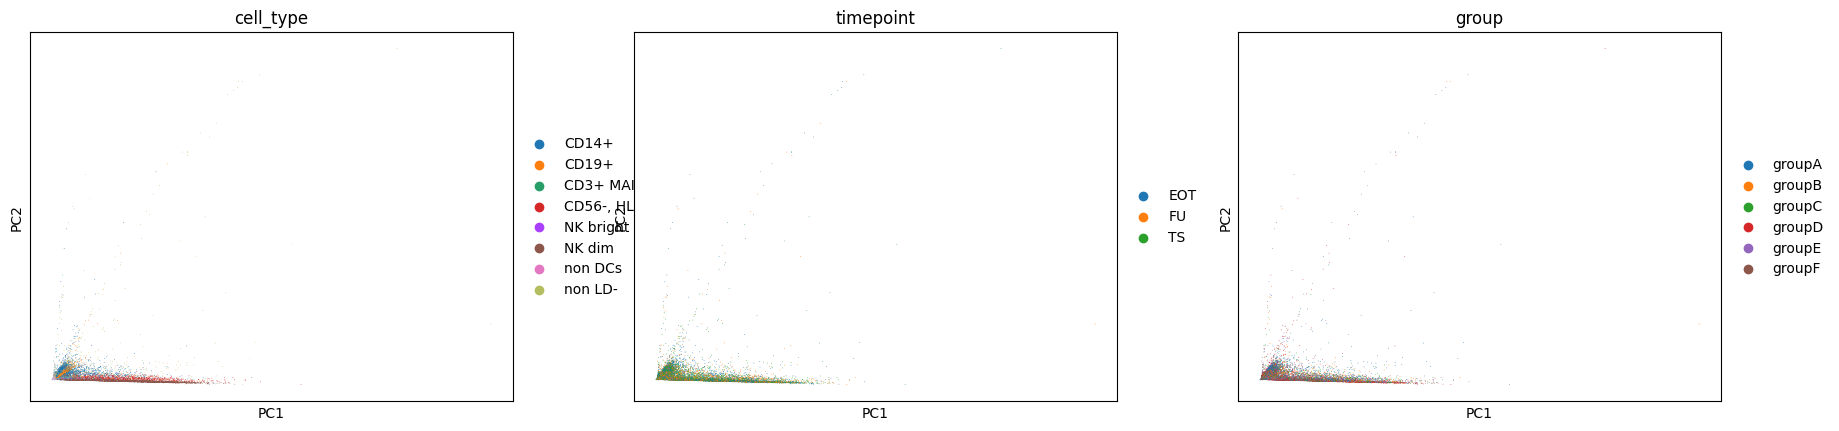

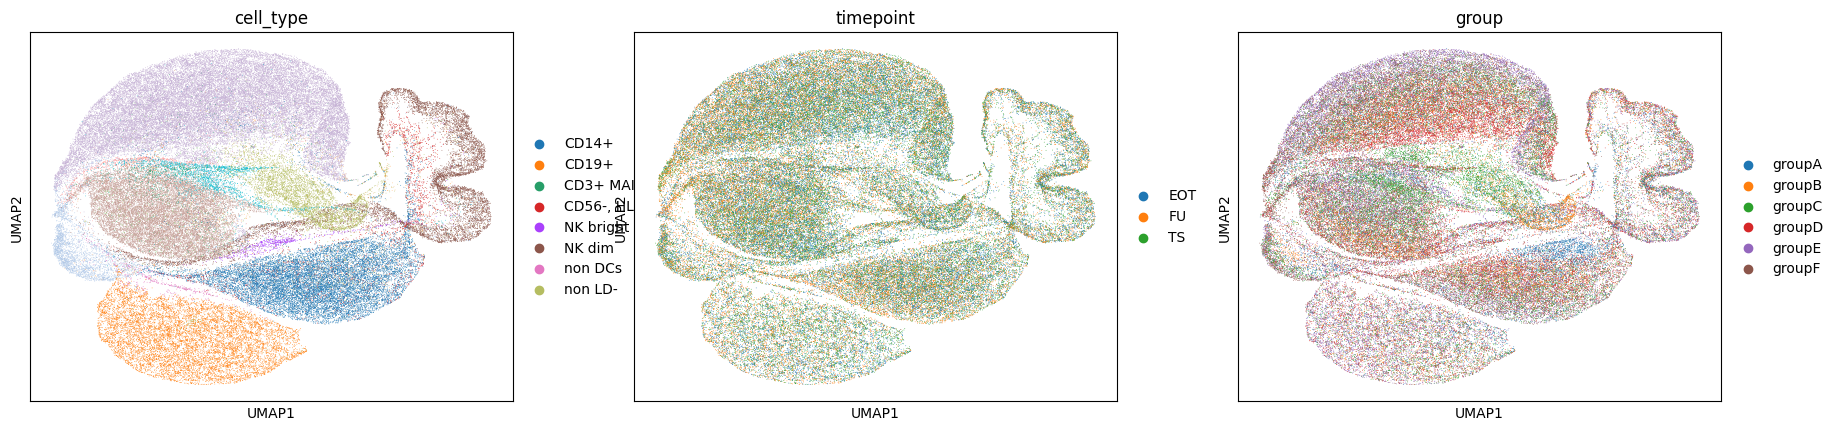

In [4]:
# Downsample the dataset to 100,000 random cells
n_cells = 100000
if adata.shape[0] > n_cells:
    adata_sub = adata[np.random.choice(adata.obs_names, n_cells, replace=False), :].copy()
else:
    adata_sub = adata

# Check the shape of the downsampled data
print(adata_sub.shape)

# Perform PCA and UMAP on the downsampled dataset
sc.tl.pca(adata_sub, svd_solver='arpack')
sc.pp.neighbors(adata_sub, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_sub)

# Plot PCA and UMAP
#sc.pl.pca(adata_sub, color=['cell_type', 'timepoint', 'group', 'patient_id'])
#sc.pl.umap(adata_sub, color=['cell_type', 'timepoint', 'group', 'patient_id'])

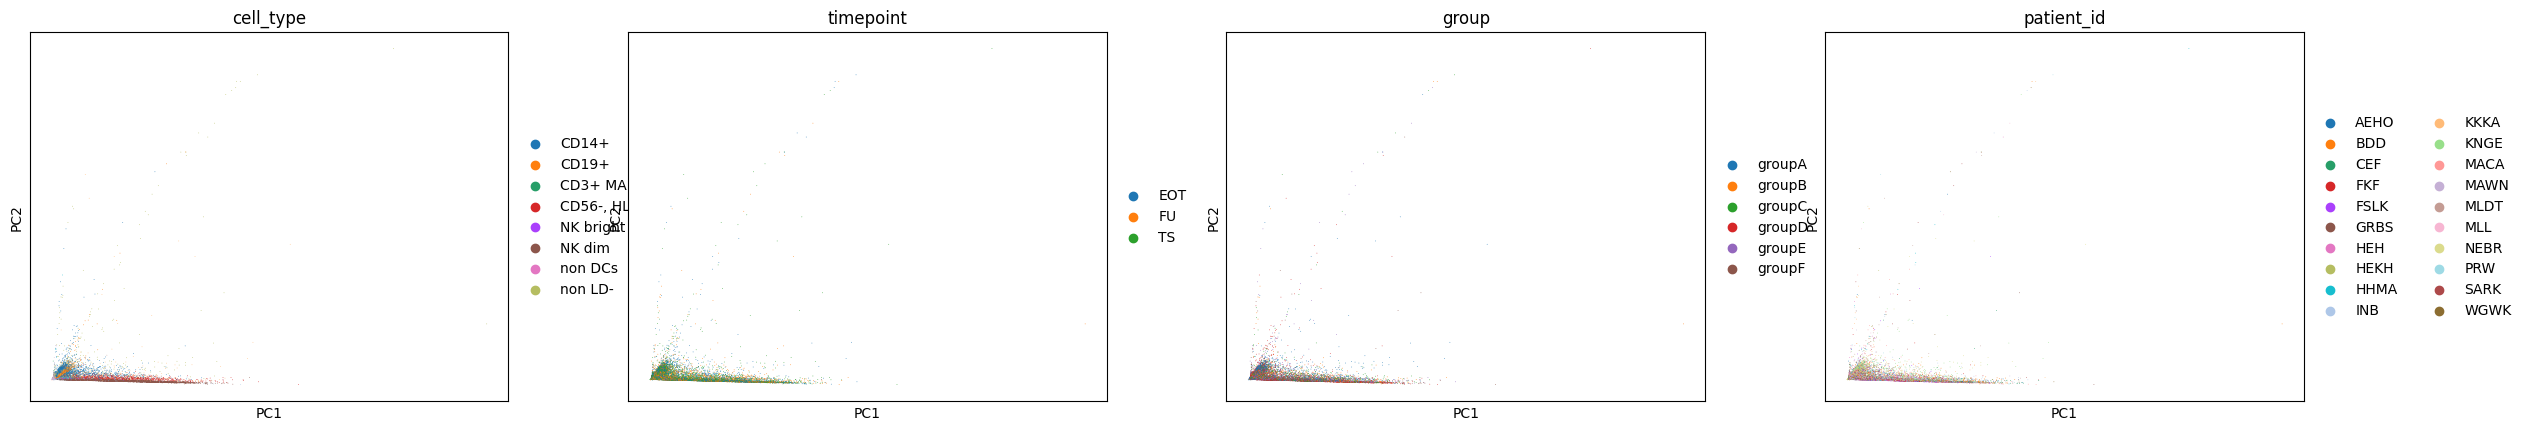

In [6]:
# Plot PCA
sc.pl.pca(adata_sub, color=['cell_type', 'timepoint', 'group', 'patient_id'])

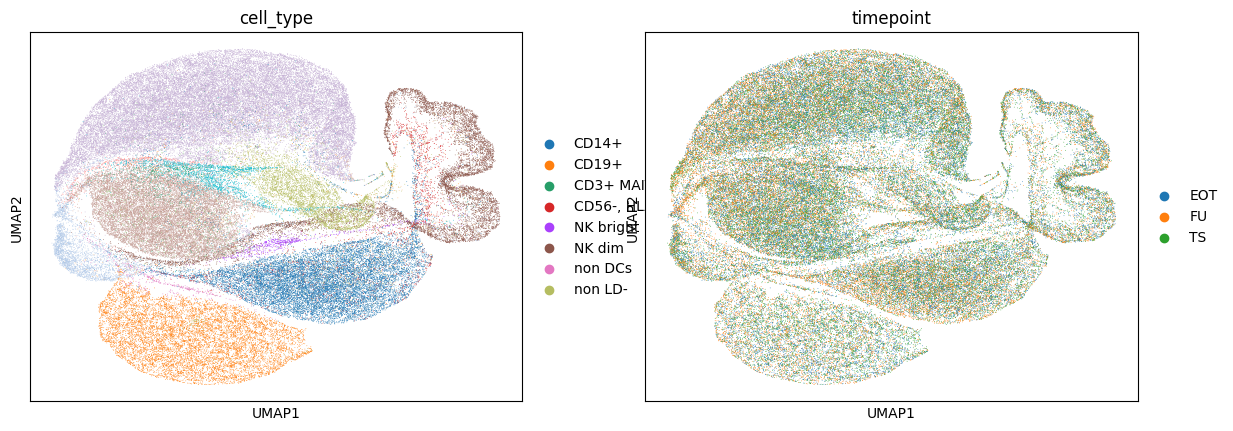

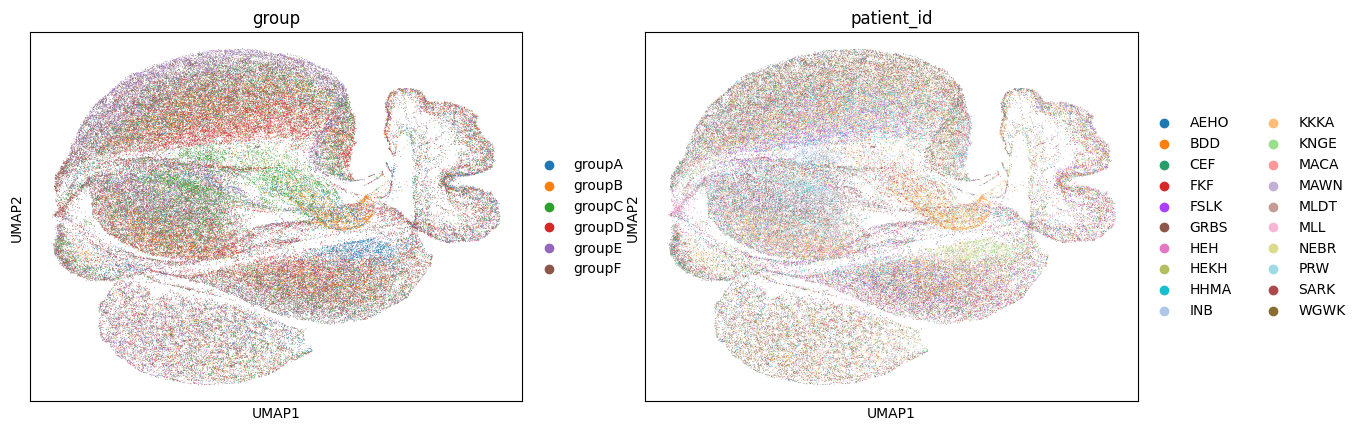

In [7]:
# UMAP
sc.pl.umap(adata_sub, color=['cell_type', 'timepoint'])
sc.pl.umap(adata_sub, color=['group', 'patient_id'])

In [ ]:
# Save as a new AnnData file
adata.write("./sce_scaled.h5ad")